# Supervised Segmentation
This notebook follows the chapter 3 of the book "Data Science for Business", by Provost and Fawcett.
It computes the attribute selection with information gain example (chapter 3).
The question is: which single attribute is the most useful for distinguishing edible mushrooms from poisonous ones.

We load the mushroom data from UC Irvine (https://archive.ics.uci.edu/ml/datasets/Mushroom) and give names to different columns using the information in the file agaricus-lepiota.names.

In [1]:
dmPath <- "Data/agaricus-lepiota.data"
dm <- read.csv(dmPath, header=FALSE)
head(dm)
colnames(dm) <- c("edible_poisonous","cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment",
                     "gill_spacing","gill_size","gill_color","stalk_shape","stalk_root",
                     "stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring",
                     "stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_color",
                     "population","habitat")
head(dm)
summary(dm)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,⋯,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,⋯,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,⋯,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,⋯,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,⋯,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,⋯,s,w,w,p,w,o,p,k,n,g


edible_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_color,population,habitat
p,x,s,n,t,p,f,c,n,k,⋯,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,⋯,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,⋯,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,⋯,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,⋯,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,⋯,s,w,w,p,w,o,p,k,n,g


 edible_poisonous cap_shape cap_surface   cap_color    bruises       odor     
 e:4208           b: 452    f:2320      n      :2284   f:4748   n      :3528  
 p:3916           c:   4    g:   4      g      :1840   t:3376   f      :2160  
                  f:3152    s:2556      e      :1500            s      : 576  
                  k: 828    y:3244      y      :1072            y      : 576  
                  s:  32                w      :1040            a      : 400  
                  x:3656                b      : 168            l      : 400  
                                        (Other): 220            (Other): 484  
 gill_attachment gill_spacing gill_size   gill_color   stalk_shape stalk_root
 a: 210          c:6812       b:5612    b      :1728   e:3516      ?:2480    
 f:7914          w:1312       n:2512    p      :1492   t:4608      b:3776    
                                        w      :1202               c: 556    
                                        n      :1048    

We notice that instead of 5644, we use here 8124 samples. The data is a bit unbalanced since we have slightly more edible mushrooms (4208) than poisonous (3916). We can compute the entropy of a set $S$, containing $k$ values, by
$$ H(S) = \sum_{i=1}^k p_i \log_2(p_i)$$
where $p_i$ is the probabiliy of getting the $i$th value. Here, we care about the attribute edible vs poisonous, this attribute takes thus 2 values, edible with probability $\frac{4208}{8124}$, and poisonous with probability $\frac{3916}{8124}$.
The entropy is 0.99 instead of 0.96 for the data set with 5644 samples.

In [2]:
N <- nrow(dm)
#number of poisonous mushrooms
nbp <- length(which(dm$edible_poisonous == "p"))
#entropy of database with respect to edible-poisonous
Hdm <- -(nbp/N)*log2(nbp/N)-((N-nbp)/N)*log2((N-nbp)/N) 
cat("no of records:",N ,"\n")
cat("no of poisonous:",nbp,"\n")
cat("entropy:",Hdm)

no of records: 8124 
no of poisonous: 3916 
entropy: 0.9990679

We would like to know which attribute, among the 22 that mushrooms have, gives the best indicator in terms of being edible. To do that, say we consider the cap shape, a mushroom can have 6 cap shapes. Then split the data into 6 groups, one for each cap shape. Then for each group (each cap shape), we compute its entropy, and we weight this entropy by the the size of the group, divided by the number of mushrooms. This is to take into account the size of the group (a small group may have given a low entropy, giving the impression that it gives a lot of information about the attribute we care about, but then if the group is small, the information may not be that much).
This is called the information gain, whose formula is
$$IG(S,A)=H(S)-\sum_{j\in {\rm values}(A)} \frac{S_j}{S}H(S_j) $$
and for our example, $S$ is the set of all mushrooms, $A$ is the attribute cap shape, which takes for values b,c,f,k,s,x, and $S_j$ is the set of mushrooms whose cap shape is a given $j$ in b,c,f,k,s,x.

In [11]:
#will store the information gain each of the 22 attributes
IG <- array(1:22)
for (col in 2:23){
    #identifies how each attribute is categorized, e.g. b c f k s x for cap_shape
    grp <- names(summary(dm[,col]))
    #will store the entropy for each category of an attribute
    Hctg <- as.vector(rep(0,length(grp)))
    #for each category of a given attribute, count how many are poisonous and edible
    for (ctg in 1:length(grp)){
        cnt_p <- length(which(dm[,1] == "p" & dm[,col] == grp[ctg]))
        cnt_e <- length(which(dm[,1] == "e" & dm[,col] == grp[ctg]))
        #count the no of records for a given category of an attribute
        Nctg <- cnt_p + cnt_e
        #this is only because we got binary entropies
        if (cnt_p > 0 & cnt_e > 0){
            Hctg[ctg] <- -(cnt_e/Nctg)*log2(cnt_e/Nctg)-(cnt_p/Nctg)*log2(cnt_p/Nctg) 
            #weighted entropies                                             
            Hctg[ctg] <- Hctg[ctg]*(Nctg/N)  
        }
    }
    IG[col-1] <- Hdm - sum(Hctg)
}
print(IG)

 [1] 0.048796702 0.028590233 0.036049283 0.192379486 0.906074977 0.014165027
 [7] 0.100883184 0.230154375 0.416977523 0.007516773 0.134817638 0.284725599
[13] 0.271894473 0.253845173 0.241415567 0.000000000 0.023817016 0.038452669
[19] 0.318021511 0.480704918 0.201958019 0.156833605


We look for the highest information gain, which is given by the attribute odor.

In [13]:
max(IG)
names(dm)[which.max(IG)+1]

[1] 0.906075

[1] "odor"

Suppose we want to look into the details of one attribute, say gill-color. We plot each $H(S_j)$ as the height of a bar plot, the width is given by $S_j/S$.

 [1] "b" "e" "g" "h" "k" "n" "o" "p" "r" "u" "w" "y"
 [1] 0.0000000 0.0000000 0.9147088 0.8536577 0.6267511 0.4904028 0.0000000
 [8] 0.9853867 0.0000000 0.4612160 0.7311486 0.8203636
[1] 0.4169775


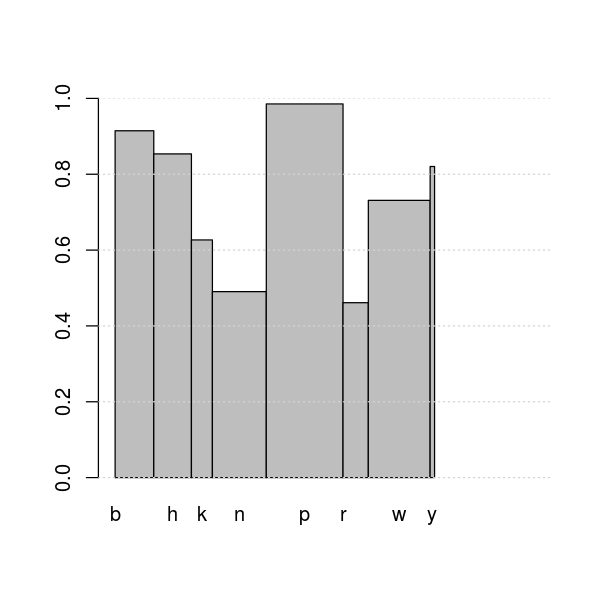

In [41]:
#needed to scale figure
library(repr)

col <- 10
#identifies how each attribute is categorized
grp <- names(summary(dm[,col]))
#will store the entropy for each category of an attribute
Hctg <- as.vector(rep(0,length(grp)))
Hctgw <- as.vector(rep(0,length(grp)))
widths <- as.vector(rep(0,length(grp)))
#for each category of a given attribute, count how many are poisonous and edible
for (ctg in 1:length(grp)){
    cnt_p <- length(which(dm[,1] == "p" & dm[,col] == grp[ctg]))
    cnt_e <- length(which(dm[,1] == "e" & dm[,col] == grp[ctg]))
    #count the no of records for a given category of an attribute
    Nctg <- cnt_p + cnt_e
    #this is only because we got binary entropies
    if (cnt_p > 0 & cnt_e > 0){
        Hctg[ctg] <- -(cnt_e/Nctg)*log2(cnt_e/Nctg)-(cnt_p/Nctg)*log2(cnt_p/Nctg) 
        #weighted entropies                                             
        Hctgw[ctg] <- Hctg[ctg]*(Nctg/N)  
        widths[ctg] <- Nctg/N
    }
}
print(grp)
print(Hctg)
IG <- Hdm - sum(Hctgw)
print(IG)
# Change plot size 
options(repr.plot.width=5, repr.plot.height=5)
barplot(Hctg,widths,names = grp,space=0,xlim=c(0,1),ylim=c(0,1))
grid(nx=NA, ny=NULL)

We notice on the plot above that if we were to plot the entropy of the whole set, this would give an area whose width on the $x$-axis would be everything, and whose height on the $y$-axis would almost everything (0.99). 
For the information gain to be as large as possible, we need the area given an attribute to be as small as possible. 
We see that for gill-color, we do reduce the area with respect with the whole set entropy, but not that much. 
We try with the attribute odor which we already know is best.

[1] "a" "c" "f" "l" "m" "n" "p" "s" "y"
[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.2141368 0.0000000
[8] 0.0000000 0.0000000
[1] 0.906075


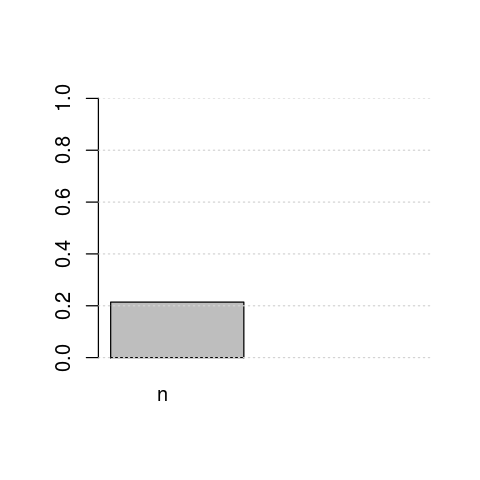

In [33]:
col <- 6
#identifies how each attribute is categorized
grp <- names(summary(dm[,col]))
#will store the entropy for each category of an attribute
Hctg <- as.vector(rep(0,length(grp)))
Hctgw <- as.vector(rep(0,length(grp)))
widths <- as.vector(rep(0,length(grp)))
#for each category of a given attribute, count how many are poisonous and edible
for (ctg in 1:length(grp)){
    cnt_p <- length(which(dm[,1] == "p" & dm[,col] == grp[ctg]))
    cnt_e <- length(which(dm[,1] == "e" & dm[,col] == grp[ctg]))
    #count the no of records for a given category of an attribute
    Nctg <- cnt_p + cnt_e
    #this is only because we got binary entropies
    if (cnt_p > 0 & cnt_e > 0){
        Hctg[ctg] <- -(cnt_e/Nctg)*log2(cnt_e/Nctg)-(cnt_p/Nctg)*log2(cnt_p/Nctg) 
        #weighted entropies                                             
        Hctgw[ctg] <- Hctg[ctg]*(Nctg/N)  
        widths[ctg] <- Nctg/N
    }
}
print(grp)
print(Hctg)
IG <- Hdm - sum(Hctgw)
print(IG)
# Change plot size 
options(repr.plot.width=4, repr.plot.height=4)
barplot(Hctg,widths,names =c("n"),space=0,xlim=c(0,1),ylim=c(0,1))
grid(nx=NA, ny=NULL)

We observe that indeed, the area is very little, thus when compared to that of the set entropy, the difference will be large. In conclusion, to figure out whether a mushroom is edible or poisonous, the best attribute to look at is its odor.